# Project: Wrangling and Analyze Data By Ashim Sharma


### Table of Contents
 - 1.Introduction
 - 2.Gathering Data
 - 3.Assessing Data
 - 4.Cleaning Data
 - 5.Analyzing Data & Visualization

## 1. Introduction

With the help of actual data, this project aims to hone data wrangling  techniques. Three steps make up the data wrangling process: collect, evaluate, and clean. The tweet history of Twitter user @dog rates, commonly known as WeRateDogs, serves as the project's dataset. Twitter user WeRateDogs provides ratings and humorous comments for user's dogs.I'll start by gathering information from many sources in various formats. After that, I'll evaluate the data programmatically and visually to spot any data quality or organization problems. Then I'll perform programmatic cleaning to address all the problems. After that, I'll examine the cleaned dataset and display the findings.

## 2. Data Gathering
Assemble the three bits of information from various sources, one for each:

 - Twitter archive from WeRateDogs: supplied to the project twitter archive enhanced.csv
 - Using the Requests library and the URL https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad image-predictions/image-predictions.tsv, image predictions.tsv was downloaded programmatically.
 - Twitter API for like and retweet counts: Using the Requests library and the URL https://video.udacity-data.com/topher/2018/November/5be5fb7d tweet-json/tweet-json.txt, tweet json.txt was downloaded programmatically.
 - Let's import our libraries to get going.

In [1]:
# Importing the packages required for the project
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import Manually Downloaded Data
df_twitter_archieve = pd.read_csv("twitter-archive-enhanced.csv")
df_twitter_archieve.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#I downloaded the file using the specified URL and the Requests library.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print(response)
# Saving this file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Reading the TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

<Response [200]>


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Saving the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [5]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## 4. Assessing Data
In order to find any difficulties with data tidiness (structural issues) or data quality (content), I will evaluate the data both visually and programmatically.

<br>Dimensions of data quality:

 - Completeness
 - Validity
 - Accuracy
 - Consistency.
<br>

Needs for tidy data:

 - Each parameter creates a column.
 - Each note creates a row.
 - A table is formed by each variety of observational unit.

## Twitter Archieve Table

In [6]:
df_twitter_archieve

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_twitter_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df_twitter_archieve.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
df_twitter_archieve.duplicated().sum()

0

In [10]:
df_twitter_archieve.tweet_id.duplicated().sum()

0

In [11]:
df_twitter_archieve.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
df_twitter_archieve.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
df_twitter_archieve.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
df_twitter_archieve.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
df_twitter_archieve.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
df_twitter_archieve.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
df_twitter_archieve.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Findings:

 - Retweeted status id, retweeted status user id, in reply to status id, and retweeted status id are float values that should all be ints. Retweets and replies entries should also be eliminated, as should related columns. Later, the image portion will be fixed.
 - Remove +0000 from the timestamp and change it to datetime if timestamp is str.
 - All canine stages, such as doggo, floofer, pupper, and puppo, should be in one column with aberrant numbers in the rating denominator, such as 170, 150, 130, etc. Almost always, the rating denominator is 10 out of the rating numerator's usual values, such as 1776, 960, 666, 204, 165, etc., make no sense.Source data redundant and difficult to read


## Image Prediction Table Operations

In [18]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
image_prediction.tweet_id.duplicated().sum()

0

In [22]:
image_prediction.jpg_url.duplicated().sum()

66

In [23]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [24]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
miniature_pinscher                 20
chow                               20
malinois                           20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [25]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

## Evaluation of the Image Prediction Table:

 - Mismatched capitalization in columns p1, p2, and p3 and duplicated jpg URL's were found.
 - Many elements in the twitter archive table should be excluded because they are not dogs, such as the jaguar, mailbox, peacock, cloak, etc. For this study, the most certain dog breed prediction is all that is required.

## Tweet json table Operations:

In [26]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
tweet_json.duplicated().sum()

0

# Quality Issues:
## Findings and Summaries:
### Twitter Archieve Table: <hr>
    
 - Only original ratings with photos are required; retweets and responses entries should be eliminated, along with related columns. The following columns in the twitter archive table should all be str: in reply to status id, in reply to user id, retweeted status id, and retweeted status user id. Later, we'll fix the picture component.
 - Remove +0000 from timestamp aberrant numbers in rating denominator, such as 170, 150, 130, etc., and timestamp is str, should be datetime. Most frequently, the rating denominator There are 10 aberrant values in the rating numerator that are illogical, such as 1776, 960, 666, 204, 165, etc.</div><hr>
 
### Image Prediction table:
 - data sources redundant and challenging to read table with predicted images p1, p2, and p3 columns have erroneous capitalisation and duplicate jpg urls
 - There are numerous entries that aren't dogs, such as a jaguar, postbox, peacock, cloak, etc.
 - For this investigation, only the most certain dog breed predictions will do.<hr>
### Tweet json Table:
 - missing data in twitter archive perhaps as a result of retweets<hr>

### Uniformity and Tidiness of data:
 - Twitter archive organization: doggo, floofer, pupper, and puppo are all dog stage names, and they should all be in one column.

 - According to the standards for clean data, the three tables should be consolidated into one because they are all connected to the same kind of observational unit.

## 5. Cleaning Data
#### We will use the programmatic way to clean the data. We will use the inline steps to implement:

 - Describe: transform our evaluations into clearly defined cleaning chores.
 -  Coding: Transform those definitions into code and execute it.
 - Testing: Test the dataset to ensure that the cleaning processes were successful, either visually or through coding.

In [28]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archieve.copy()
df_image_prediction_clean = image_prediction.copy()
df_tweet_json_clean = tweet_json.copy()

## Issue #1:
### df_twitter_archieve:Retweets and replies are not desired; only original ratings are desired.

### Define:
#### Only keep rows where the retweeted status id field contains NaN by using the isnull() filter. The same procedure is used for in reply to status id.

#### Code

In [29]:
# Eliminate retweets
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_id.isnull()]

# Eliminate replies
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id.isnull()]

#### Test

In [30]:
df_twitter_archive_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

## Issue #2:
### df_twitter_archieve:Remove the retweets and replies-related columns. The datatype issue with those columns will be resolved after they are dropped.


#### Define: Retweeted status id, Retweeted status user id, and Retweeted status timestamp columns can all be deleted with df.drop.

#### Code

In [31]:
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

#### Test

In [32]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


## Issue #3:
### df_twitter_archieve:timestamp datatype should be datetime; delete +0000


#### Define: To convert a timestamp from str to datetime, remove +0000 and use pd.to datetime to do so.

#### Code

In [33]:
# Remove +0000
df_twitter_archive_clean.timestamp = df_twitter_archive_clean.timestamp.str[:-6]

# Convert to datetime
df_twitter_archive_clean.timestamp = pd.to_datetime(df_twitter_archive_clean.timestamp)

#### Test

In [34]:
df_twitter_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

## Issue #4:
### df_twitter_archieve:Duplicate source information, substitute shorter category names for the lengthy url


#### Define: Use replace to substitute short category names for the url.

#### Code

In [35]:
df_twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [36]:
df_twitter_archive_clean.source = df_twitter_archive_clean.source.replace({'Twitter for iPhone':'Twitter for iPhone',
                                                                     'Vine - Make a Scene':'Vine - Make a Scene',
                                                                     'Twitter Web Client': 'Twitter Web Client',
                                                                     'TweetDeck': 'TweetDeck'})

#### Test

In [37]:
df_twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Issue #5:
### Image Prediction Table:Delete any dog-related entries. The same is true of tweet json and twitter archive. It would be simpler to address concerns with abnormal rating in rating denominator and rating numerator since many anomalous rating values would be gone.


#### Define: Use isin function to filter and remove rows from all three dataframes that have p1 dog, p2 dog, and p3 dog columns that are False.

#### Code

In [38]:
# Rows in the data before cleaning
print(df_image_prediction_clean.shape)
print(df_twitter_archive_clean.shape)
print(df_tweet_json_clean.shape)

(2075, 12)
(2097, 12)
(2354, 3)


In [39]:
#Put tweet ids from postings that are not about dogs into a drop list after filtering them.
df_image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = df_image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the drop_list in all dataframes
df_image_prediction_clean = df_image_prediction_clean[~df_image_prediction_clean.tweet_id.isin(drop_list)]
df_twitter_archive_clean = df_twitter_archive_clean[~df_twitter_archive_clean.tweet_id.isin(drop_list)]
df_tweet_json_clean = df_tweet_json_clean[~df_tweet_json_clean.tweet_id.isin(drop_list)]

#### Test

In [40]:
# Number of rows remaining after data cleaning
print(df_image_prediction_clean.shape)
print(df_twitter_archive_clean.shape)
print(df_tweet_json_clean.shape)

(1751, 12)
(1792, 12)
(2031, 3)


## Issue #6:
### Twitter Archieve Table:incorrect values in the rating denominator. The project overview states that the ratings typically have a denominator of 10. After deleting the ratings that weren't for dogs, a lot of the aberrant rating values were gone, which made fixing the anomalous rating easy. Further research revealed that tweets with a denominator less than 10 were typically numerous dogs.


#### Define: The columns tweet id, text, rating numerator, and rating denominator should be added to a new dataframe. To correct these ratings, filter for rating denominator not equal to 10 and then read the text.

#### Code


In [41]:
# Creating new dataframe with selected columns
df_abnor_rating = df_twitter_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Filter rating_denominator not equal to 10
df_abnor_denominator = df_abnor_rating.query('rating_denominator != 10')

# Display full text
pd.set_option('display.max_colwidth', -1)

df_abnor_denominator

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [42]:
# Correction of ratings by reading through the text, most of the abnormal ratings are associated with Several dogs.
# tweet_id: 666287406224695296
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10
# tweet_id: 697463031882764288 ---> Several Dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
# tweet_id: 684222868335505415 ---> several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10
# tweet_id: 682962037429899265 
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# tweet_id: 710658690886586372 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
# tweet_id: 713900603437621249 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
# tweet_id: 709198395643068416 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
# tweet_id: 722974582966214656 
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
# tweet_id: 716439118184652801
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
# tweet_id: 704054845121142784 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
# tweet_id: 677716515794329600 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
# tweet_id: 675853064436391936 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
# tweet_id: 810984652412424192  rating missing
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10
# tweet_id: 820690176645140481 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
# tweet_id: 731156023742988288 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 12
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
# tweet_id: 758467244762497024 --- several dogs
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10
# tweet_id: 740373189193256964
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

#### Test

In [43]:
df_twitter_archive_clean.rating_denominator.value_counts()

10    1792
Name: rating_denominator, dtype: int64

## Issue #7:
### Twitter Archieve Table:Irregular values in the rating numerator. After deleting the ratings that weren't for dogs, several anomalous rating levels disappeared.


#### Define: 
 - To identify unusual values, use value counts; to fix the ratings, verify the text.
 - To eliminate entires that are not dogs, use isin and~.

#### Code

In [44]:
df_twitter_archive_clean.rating_numerator.value_counts()

12    464
10    380
11    379
13    256
9     136
8     71 
7     31 
14    27 
6     16 
5     15 
4     6  
3     5  
2     2  
75    1  
27    1  
26    1  
0     1  
Name: rating_numerator, dtype: int64

In [45]:
df_abnor_rating.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [46]:
# Correcting the ratings
# tweet_id: 786709082849828864, rating _numberator should be 9.75 according to the text
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
# tweet_id: 680494726643068929, rating _numberator should be 11.26 according to the text
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
# tweet_id: 778027034220126208, rating _numberator should be 11.27 according to the text
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
# tweet_id: 835152434251116546
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 835152434251116546, 'rating_numerator'] = 11
# tweet_id: 883482846933004288
df_twitter_archive_clean.loc[df_twitter_archive_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5

In [47]:
# rating_numerator 3 and 4
df_abnor_rating.query('rating_numerator == 3 or rating_numerator == 4')

,tweet_id,text,rating_numerator,rating_denominator
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
1303,707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4,10
1701,680940246314430465,This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,4,10
1938,673906403526995968,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,3,10
2070,671122204919246848,Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,4,10
2183,668989615043424256,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,3,10


#### rating_numerator = 3,is not a dog,So we can delete

 - 777885040357281792:
 - 718246886998687744:
 - 673906403526995968:
#### rating_numerator = 4,is not a dog,So we can delete

 - 707420581654872064
 - 680940246314430465
 - 671122204919246848
 - 667176164155375616
 - 666649482315059201

In [48]:
# removing the I for the data which are not Dogs
id_list = [777885040357281792, 718246886998687744, 673906403526995968, 707420581654872064, 680940246314430465, 671122204919246848, 667176164155375616, 666649482315059201]
df_twitter_archive_clean = df_twitter_archive_clean[~df_twitter_archive_clean.tweet_id.isin(id_list)]

#### Test

In [49]:
df_twitter_archive_clean.rating_numerator.value_counts()

12.00    464
10.00    380
11.00    380
13.00    256
9.00     136
8.00     71 
7.00     31 
14.00    27 
6.00     16 
5.00     14 
3.00     2  
2.00     2  
9.75     1  
11.26    1  
4.00     1  
13.50    1  
11.27    1  
Name: rating_numerator, dtype: int64

### Constraint: There are still some rating problems. For instance, some ratings still don't apply to dogs even after many items from the image prediction table have been eliminated. It would be impractical to read them all.

## Issue #8:
### Image Prediction Table:We simply need to use the image forecast that is the most certain.


#### Define: 
 - Add two new columns for breed and confidence level.
 - Create a function to sort through the predictions and identify the one that is most certain to be a breed of dog. The most certain prediction is p1, which is followed by p2 and p3.
 - Removing any unnecessary columns.

#### Code

In [50]:
# Create a dog_breed column and a confidence_level column
dog_breed = []
confidence_level = []

# Create a function to find the most confidence prediction that is a dog_breed
# p1 is the most confidence prediction, followed by p2 and p3
def image_pred(df_image_prediction_clean):
    if df_image_prediction_clean.p1_dog == True:
        dog_breed.append(df_image_prediction_clean.p1)
        confidence_level.append(df_image_prediction_clean.p1_conf)
    elif df_image_prediction_clean.p2_dog == True:
        dog_breed.append(df_image_prediction_clean.p2)
        confidence_level.append(df_image_prediction_clean.p2_conf)
    elif df_image_prediction_clean.p3_dog == True:
        dog_breed.append(df_image_prediction_clean.p3)
        confidence_level.append(df_image_prediction_clean.p3_conf)
    else:
        dog_breed.append('Unknown_dog_breed')
        confidence_level.append(0)
        
# Apply the function by column        
df_image_prediction_clean.apply(image_pred, axis=1)

# Add the dog_breed and confidence_level column to df_image_prediction_clean 
df_image_prediction_clean['dog_breed'] = dog_breed
df_image_prediction_clean['confidence_level'] = confidence_level

# Drop columns no longer needed
df_image_prediction_clean = df_image_prediction_clean.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

#### Test

In [51]:
df_image_prediction_clean.head()

,tweet_id,jpg_url,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


## Issue #9:
### Image Prediction Table:Irregular capitalization in the p1 column


#### Define: To capitalize the first letter, use str.capitalize function fronm the pandas library.

#### Code

In [52]:
df_image_prediction_clean.dog_breed = df_image_prediction_clean.dog_breed.str.capitalize()

In [53]:
df_image_prediction_clean.head(15)

,tweet_id,jpg_url,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden_retriever,0.775930


# 6. Tidiness

### 1. df_twitter_archive data: All canine stages, including doggo, floofer, pupper, and puppo, should be in a single column.

#### Define: The doggo, floofer, pupper, and puppo columns can be melted into a type and dog stage column using pd.melt. Remove the middle column.



#### Code

In [54]:
# Melt the doggo, floofer, pupper and puppo columns to type and dogs_phase column
df_twitter_archive_clean = pd.melt(df_twitter_archive_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_phase')

# Drop type column  
df_twitter_archive_clean.drop('type', 1, inplace = True)

# Sort by dog_phase and drop duplicates
df_twitter_archive_clean = df_twitter_archive_clean.sort_values('dog_phase').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [55]:
df_twitter_archive_clean.dog_phase.value_counts()

None       1494
pupper     194 
doggo      63  
puppo      23  
floofer    10  
Name: dog_phase, dtype: int64

### 2. df_twitter_archive data:The twitter archive table should contain the tweet json file.

#### Define:Join the retweet count and favorite count columns to the tweet id field in the twitter archive database.

#### Code

In [56]:
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_tweet_json_clean,
                            on = ['tweet_id'], how = 'left')

#### Test

In [57]:
df_twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,retweet_count,favorite_count
0,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273
1,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,242,559
2,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,294,565
3,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,231,563
4,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12.0,10,None,None,2272,7148


### 3. The twitter archive table needs to include image prediction. Rows with images should only be retained because we only want original ratings that include them.

#### Define: 
 - Using the tweet id as a joining factor, use merge to combine the image prediction table and the twitter archive table.
 - Only nonnull rows should be retained after using the notnull filter.

#### Code

In [58]:
# Joining tables using left join
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, df_image_prediction_clean,
                            on = ['tweet_id'], how = 'left')

# number of null values before cleaning
df_twitter_archive_clean.jpg_url.isnull().sum()

126

In [59]:
df_twitter_archive_clean = (df_twitter_archive_clean[df_twitter_archive_clean.jpg_url.notnull()])

#### Test

In [60]:
# number of null values after cleaning
df_twitter_archive_clean.jpg_url.isnull().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
df_twitter_archive_clean.head()  ## Viewing the data

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_phase,retweet_count,favorite_count,jpg_url,dog_breed,confidence_level
0,667470559035432960,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175
1,667491009379606528,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088
2,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957
3,667502640335572993,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709
4,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12.0,10,None,None,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,Beagle,0.636169


In [62]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1783
Data columns (total 14 columns):
tweet_id              1658 non-null int64
timestamp             1658 non-null datetime64[ns]
source                1658 non-null object
text                  1658 non-null object
expanded_urls         1658 non-null object
rating_numerator      1658 non-null float64
rating_denominator    1658 non-null int64
name                  1658 non-null object
dog_phase             1658 non-null object
retweet_count         1658 non-null int64
favorite_count        1658 non-null int64
jpg_url               1658 non-null object
dog_breed             1658 non-null object
confidence_level      1658 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 194.3+ KB


In [63]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
df_twitter_archive_clean.to_csv('twitter_archive_master.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
### Popular dog breeds determined on the basis of the following:
 - the quantity of unique tweets
 - total number of retweets
 - total number of favorites

In [64]:
df.dog_breed.value_counts()

Golden_retriever                  156
Labrador_retriever                106
Pembroke                          94 
Chihuahua                         88 
Pug                               62 
Toy_poodle                        50 
Chow                              48 
Samoyed                           42 
Pomeranian                        41 
Malamute                          33 
Chesapeake_bay_retriever          31 
French_bulldog                    31 
Cocker_spaniel                    30 
Miniature_pinscher                24 
Eskimo_dog                        22 
German_shepherd                   21 
Cardigan                          21 
Shih-tzu                          20 
Beagle                            20 
Staffordshire_bullterrier         20 
Siberian_husky                    20 
Maltese_dog                       19 
Rottweiler                        18 
Shetland_sheepdog                 18 
Italian_greyhound                 17 
Basset                            17 
Lakeland_ter

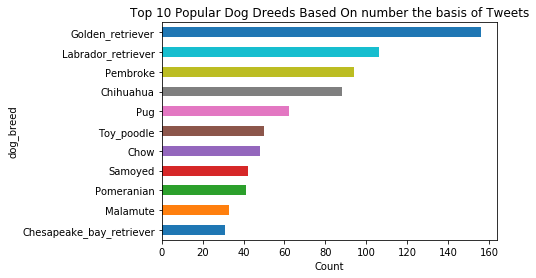

In [65]:
# Create a bar graph showing the top 10 dog breeds based on the number of posts.
df.dog_breed.value_counts()[10::-1].plot(kind = 'barh', title = 'Top 10 Popular Dog Dreeds Based On number the basis of Tweets')
plt.xlabel('Count')
plt.ylabel('dog_breed');

## Insights from the above Graph:
To keep tweets about dogs solely, we sanitized the image prediction data. The Golden Retriever is the most popular dog breed, according to the graph, which shows 156 tweets about it. 106 tweets on the Labrador retriever make it the second most popular breed. Pembroke (94), Chihuahua (88), and Pug (62), followed in decreasing order by other breeds, are the following three breeds. Then, using data from favorites and retweets, we'll plot the most popular dog breeds.

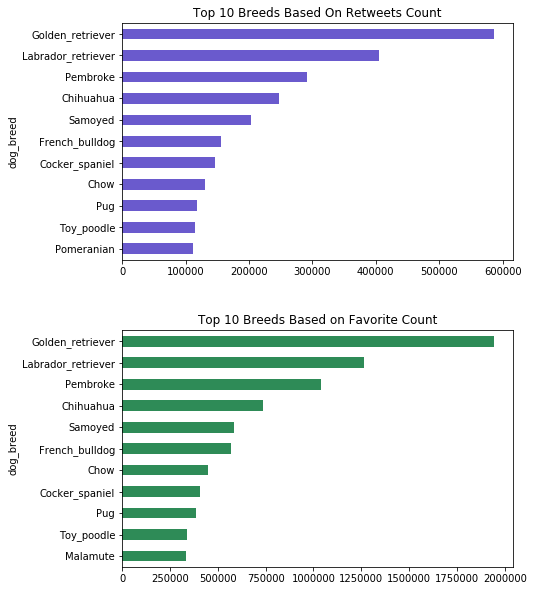

In [66]:
# Data to plot
columns = ['dog_breed', 'retweet_count', 'favorite_count']
df_dog_breed = df[columns]

dog_breed_retweet = df_dog_breed.groupby('dog_breed')['retweet_count'].agg('sum').sort_values(ascending=False)[10::-1]
dog_breed_favorite = df_dog_breed.groupby('dog_breed')['favorite_count'].agg('sum').sort_values(ascending=False)[10::-1]

# Plot horizontal bar chart
fig, (ax1, ax2) = plt.subplots(2, 1)

# Top 10 breeds based on number of retweets
dog_breed_retweet.plot.barh(ax=ax1, figsize=(7,10), color='#6A5ACD')
ax1.set_title("Top 10 Breeds Based On Retweets Count")

# Top 10 breeds based on number of favorite
dog_breed_favorite.plot.barh(ax=ax2, color='#2E8B57')
ax2.set_title("Top 10 Breeds Based on Favorite Count")

fig.subplots_adjust(hspace=0.3)

## Insights From the above Bar graphs:
Golden retrievers, Labrador retrievers, Pembroke, Chihuahua, Pug, Toy poodle, Chow, and Samoyed are the top 10 most popular breeds according to the number of tweets. In decreasing order, Pomeranian, Malamute, and Chesapeake Bay retriever. Golden retrievers, Labrador retrievers, Pembroke, Chihuahua, Samoyed, French bulldog, Cocker spaniels, Chow, Pug, Toy poodles, and Pomeranians are the top 10 breeds according to the number of retweets. Top 10 breeds based on favorite count are very similar to retweet count (with the exception of the 5th-ranked French bulldog, 6th-ranked Chow, 7th-ranked Cocker spaniel, and 10th-ranked Malamute). This is likely because there may be a correlation between favorites and retweets since people who retweet are more likely to click favorites. The three graphs show the same pattern, showing that the top four dog breeds in popularity are the golden retriever, labrador retriever, pembroke, and chihuahua.

## 2. What is the most common Dog Phase?

In [67]:
df.dog_phase.value_counts(normalize=True)

None       0.844994
pupper     0.104343
doggo      0.032569
puppo      0.013269
floofer    0.004825
Name: dog_phase, dtype: float64

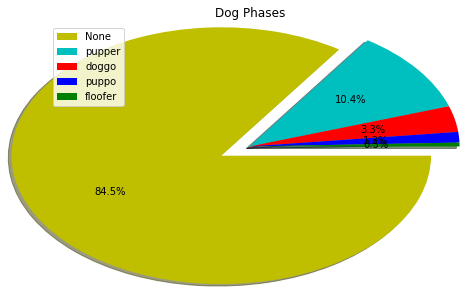

In [68]:
# Plot pie chart
labels = ['None', 'pupper', 'doggo', 'puppo', 'floofer']
values = df.dog_phase.value_counts(normalize=True)
colors = ['y', 'c', 'r' ,'b', 'g']
explode = (0.2, 0, 0, 0, 0)

plt.pie(values, colors=colors, explode=explode, autopct='%1.1f%%', radius = 1.3, shadow=True, counterclock=False)
plt.legend(labels, loc=0)
plt.title('Dog Phases')
plt.tight_layout()

## Insights from Pie Chart
According to the pie chart, more than 80% of tweets do not include information about the dog phase in the article. Pupper is the most frequent phase among all those tweets for individuals who have the phase information.

## 3. Rating the numerator
#### We'll concentrate on rating numerator here because the denominator of a rating is almost always 10, and because the dataset has been cleaned.

In [69]:
df.rating_numerator.value_counts()

12.00    424
10.00    361
11.00    359
13.00    222
9.00     133
8.00     68 
7.00     31 
14.00    22 
6.00     16 
5.00     13 
2.00     2  
3.00     2  
11.26    1  
13.50    1  
9.75     1  
4.00     1  
11.27    1  
Name: rating_numerator, dtype: int64

In [70]:
df.rating_numerator.describe()

count    1658.000000
mean     10.868384  
std      1.683681   
min      2.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

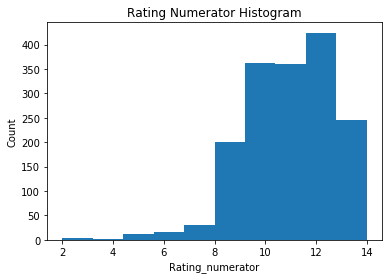

In [71]:
plt.hist(df.rating_numerator)
plt.title('Rating Numerator Histogram')
plt.xlabel('Rating_numerator')
plt.ylabel('Count');

#### As we can see, the most popular ratings are 12 with 424 tweets, followed by 10.00, 11.00, 13 (222 tweets), and 9.00. (133 tweets). The rating is 10.87 on average.

### 4. Based on the number of tweets, popular dog breeds receive average ratings

In [72]:
# Make a list of top popular dog breeds based on number of tweets
top_tweet_count = df.dog_breed.value_counts().sort_values(ascending=False).nlargest(10).rename_axis('dog_breed').reset_index(name='tweet_counts')
dog_breed_list = top_tweet_count.dog_breed.tolist()

# Average rating for top breeds based on number of tweets
avg_rating = df.groupby('dog_breed').rating_numerator.mean().sort_values(ascending=False).rename_axis('dog_breed').reset_index(name='avg_rating')
dog_breed_avg_rating = avg_rating[avg_rating['dog_breed'].isin(dog_breed_list)]

dog_breed_avg_rating

,dog_breed,avg_rating
10,Samoyed,11.690476
11,Golden_retriever,11.612179
15,Pembroke,11.425532
16,Chow,11.416667
28,Labrador_retriever,11.198113
37,Toy_poodle,11.000000
47,Pomeranian,10.945122
51,Malamute,10.878788
61,Chihuahua,10.693182
78,Pug,10.241935


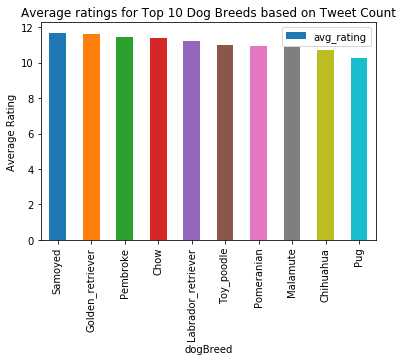

In [73]:
# Plot chart
dog_breed_avg_rating.plot(kind='bar', x='dog_breed', y='avg_rating')  
plt.title('Average ratings for Top 10 Dog Breeds based on Tweet Count')
plt.ylabel("Average Rating")
plt.xlabel("dogBreed");

### It is clear that popular dogs are rated similarly to one another.

## Citation:


In [74]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1627
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     22  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    9   
Name: source, dtype: int64

In [75]:
df.source.value_counts(normalize=True)

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     0.981303
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     0.013269
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    0.005428
Name: source, dtype: float64

## We can see that the vast majority of users (98%) use iPhones.

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0